In [1]:
import tables
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def binned_histogram(xdata, error, bins=11, quant=68, logspace=True):
    """
    input: xdata and the corresponding percentage error. as np.array
    return: return the bin centers, mean and std of in each bin.
    bins : Number of bins. Shoud be an interger not a list. or array.
    """
    if logspace:
        bins = np.logspace(np.log10(np.min(xdata)), np.log10(np.max(xdata)), bins)
    else:
        bins = np.linspace(np.min(xdata), np.max(xdata), bins)
    #hist, bin_edges = np.histogram(xdata, bins=bins)
    centers = (bins[1:] + bins[:-1]) / 2.0
    lower = centers - bins[:-1]
    upper = bins[1:] - centers
    std_error = []
    median_err = []
    countour_up = []
    countour_low = []
    number_events = []
    for lower, upper in zip(bins[:-1], bins[1:]):
        cut = (xdata >= lower) & (xdata < upper)
        error_distribution = error[cut]
        std_error.append(np.std(error_distribution))
        median_value = np.median(error_distribution)
        upper_limit = np.percentile(error_distribution, q=50 + quant/2)
        lower_limit = np.percentile(error_distribution, q=50 - quant/2)
        median_err.append(median_value)
        countour_up.append(upper_limit - median_value)
        countour_low.append(median_value - lower_limit)
        number_events.append(len(error_distribution))
    return (
        centers,
        np.array(median_err),
        np.array(std_error),
        np.array(countour_low),
        np.array(countour_up),
        np.array(number_events)
    )

# <span style='color:Black'> Data preprocessing </span>

In [3]:
file = tables.open_file('muon_gun_reco_spline_sim0005_water_sim0004.hdf5')
#for name in file:
#    print(name)

In [4]:

data_dict = {
    'event_id': file.root.event_id.cols.value[:],

    'angular_error_linefit' : np.degrees(file.root.angular_error_linefit.cols.value[:]),
    'angular_error_mmsreco': np.degrees(file.root.angular_error_LLHFit_mmsreco.cols.value[:]),
    'angular_error_splines_35ns': np.degrees(file.root.angular_error_LLHFit_step1.cols.value[:]),
    'angular_error_splines_20ns': np.degrees(file.root.angular_error_LLHFit_step2.cols.value[:]),
    'angular_error_splines_10ns': np.degrees(file.root.angular_error_LLHFit_step3.cols.value[:]),
    'angular_error_splines_05ns': np.degrees(file.root.angular_error_LLHFit_step4.cols.value[:]),

    'logl_splines_35ns': file.root.logl_splines_35ns.cols.value[:],
    'logl_splines_20ns': file.root.logl_splines_20ns.cols.value[:],
    'logl_splines_10ns': file.root.logl_splines_10ns.cols.value[:],
    'logl_splines_05ns': file.root.logl_splines_05ns.cols.value[:],
    'logl_mmsreco': file.root.logl_mmsreco.cols.value[:],
    'logl_mctruth': file.root.logl_mctruth.cols.value[:],
    'nchannels_count': file.root.nchannels_count.cols.value[:],
    'qtotal_clean': file.root.qtotal_clean.cols.value[:],
    'qtotal_unclean': file.root.qtotal_unclean.cols.value[:],
    'nhits_clean': file.root.nhits_clean.cols.value[:],
    'nhits_unclean': file.root.nhits_unclean.cols.value[:],
    'zenith_angle': np.degrees(file.root.zenith_angle.cols.value[:]),
    #'numu_energy': file.root.numu_energy.cols.value[:],
    'muon_energy': file.root.muon_energy.cols.value[:],
    'dirTrackLengthA_reco': file.root.track_length.cols.value[:]
}

In [5]:
df = pd.DataFrame(data_dict)
df

,event_id,angular_error_linefit,angular_error_mmsreco,angular_error_splines_35ns,angular_error_splines_20ns,angular_error_splines_10ns,angular_error_splines_05ns,logl_splines_35ns,logl_splines_20ns,logl_splines_10ns,logl_splines_05ns,logl_mmsreco,nchannels_count,qtotal_clean,qtotal_unclean,nhits_clean,nhits_unclean,zenith_angle,muon_energy,dirTrackLengthA_reco
0,4.0,0.487677,0.109332,0.598010,0.270942,0.217696,0.006116,2879.779777,2745.899079,2598.279414,2480.509945,2343.115684,63.0,2844.136218,3201.873678,517.0,869.0,150.662855,512903.553092,915.748829
1,9.0,116.275724,83.227653,81.310991,83.161634,83.135916,83.297585,248.280952,247.550087,247.290345,247.158064,247.005134,11.0,79.610525,468.841221,41.0,424.0,105.507968,11354.850029,NaN
2,12.0,0.181515,0.170790,0.242992,0.232130,0.122696,0.181000,678.998556,649.016390,616.140479,591.549206,568.496264,36.0,335.144792,700.630904,118.0,474.0,142.081745,17764.540622,968.139153
3,13.0,4.734283,0.172002,2.577853,1.582213,0.842176,0.128831,108.864398,99.335567,91.637313,85.907228,72.414210,8.0,40.449310,366.870945,22.0,345.0,31.642455,1786.377278,465.954543
4,14.0,2.429265,3.315244,4.769528,3.444290,3.240858,3.055932,252.508423,232.102993,213.014226,201.210634,189.346561,11.0,786.244719,1067.619258,48.0,324.0,46.952518,19814.882604,200.199007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293184,489.0,155.705780,120.540935,119.336943,120.297201,120.413764,120.550193,165.083890,165.035099,164.974066,164.933075,164.908313,8.0,27.941514,382.254641,17.0,374.0,71.963934,52549.088219,NaN
293185,490.0,1.708691,0.017255,1.086974,0.102729,0.076083,0.058836,1939.751888,1823.935646,1707.745229,1609.186348,1493.774424,47.0,2787.833402,3132.304609,351.0,695.0,92.996455,507285.577759,879.021947
293186,492.0,21.252562,26.426626,25.527996,26.412424,26.430826,26.428832,396.409230,392.136229,392.012270,391.787484,391.579061,19.0,118.212451,459.260647,75.0,406.0,90.655452,186959.461117,NaN
293187,493.0,90.433929,NaN,90.433929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,10.808382,368.199126,9.0,373.0,31.042847,2823.378348,NaN


In [6]:
df.describe()

,event_id,angular_error_linefit,angular_error_mmsreco,angular_error_splines_35ns,angular_error_splines_20ns,angular_error_splines_10ns,angular_error_splines_05ns,logl_splines_35ns,logl_splines_20ns,logl_splines_10ns,logl_splines_05ns,logl_mmsreco,nchannels_count,qtotal_clean,qtotal_unclean,nhits_clean,nhits_unclean,zenith_angle,muon_energy,dirTrackLengthA_reco
count,293189.000000,293189.000000,284474.000000,293189.000000,285515.000000,284770.000000,284533.000000,285515.000000,284770.000000,284533.000000,284474.000000,284431.000000,293189.000000,293189.000000,293189.000000,293189.000000,293189.000000,293189.000000,293189.000000,259514.000000
mean,250.868457,22.742529,17.092411,19.706521,17.600007,17.279996,17.145171,847.239644,814.416943,783.616028,760.345421,737.856038,23.654626,589.031441,927.352239,141.932252,478.448888,90.099368,211742.656638,492.926964
std,144.355762,31.966403,30.146756,32.160507,30.224494,30.144364,30.134336,928.793043,894.781316,861.570669,837.002676,813.939073,17.519471,973.429511,982.187167,160.181116,173.846806,37.937287,255041.050657,329.501806
min,1.000000,0.004527,0.000151,0.001333,0.000583,0.000695,0.000310,-185.008096,-185.233890,-185.318373,-185.339711,-185.346844,1.000000,2.705708,241.891841,2.000000,238.000000,0.107582,100.568233,0.000000
25%,126.000000,2.883662,0.103584,0.569443,0.373676,0.249143,0.169005,221.917544,212.418136,204.205010,197.779145,191.159713,10.000000,57.515678,392.785495,34.000000,362.000000,60.853217,22566.634236,169.500827
50%,251.000000,8.017742,1.078521,3.651762,2.140669,1.555230,1.211324,496.426665,477.440020,460.078198,446.416860,433.315139,18.000000,194.399587,535.018476,80.000000,420.000000,90.213678,94254.919141,507.257911
75%,376.000000,27.299466,19.551026,23.102334,19.953711,19.640306,19.563457,1130.713073,1087.594715,1046.451271,1015.393477,985.623279,33.000000,690.933993,1037.988310,190.000000,538.000000,119.284529,319720.660275,771.882781
max,500.000000,179.136051,178.722106,179.169986,179.267262,178.686388,178.675839,10204.216720,9727.347525,9209.840143,8792.755286,8389.121842,145.000000,16603.147520,16983.418838,1827.000000,2217.000000,179.638137,999992.498902,1390.172789


In [7]:
# Checking NaN on entire DataFrame
print(df.isnull().values.any())

True


In [8]:
# Count NaN on entire DataFrame
print(df.isnull().sum())

event_id                          0
angular_error_linefit             0
angular_error_mmsreco          8715
angular_error_splines_35ns        0
angular_error_splines_20ns     7674
angular_error_splines_10ns     8419
angular_error_splines_05ns     8656
logl_splines_35ns              7674
logl_splines_20ns              8419
logl_splines_10ns              8656
logl_splines_05ns              8715
logl_mmsreco                   8758
nchannels_count                   0
qtotal_clean                      0
qtotal_unclean                    0
nhits_clean                       0
nhits_unclean                     0
zenith_angle                      0
muon_energy                       0
dirTrackLengthA_reco          33675
dtype: int64


In [9]:
bins = 50
energy_min = 1e3
energy_max = 1e6

In [10]:
df = df.dropna()
df = df.loc[(df['muon_energy'] >= energy_min)]
df = df.loc[(df['muon_energy'] <= energy_max)]

# <span style='color:Black'> Angular resolution vs Muon Energy </span>

In [23]:
# Data preprocessing
bins = 50
energy_min = 1e3
energy_max = 1e6

In [24]:
dict_reco = {
    'linefit': ['0', 'angular_error_linefit'],
    '35ns conv': ['1', 'angular_error_splines_35ns'],
    '20ns conv': ['2', 'angular_error_splines_20ns'],
    '10ns conv': ['3','angular_error_splines_10ns'],
    '5ns conv': ['4','angular_error_splines_05ns'],
    'splines': ['5','angular_error_mmsreco'],
    'mctruth': ['6','angular_error_mctruth']
    }

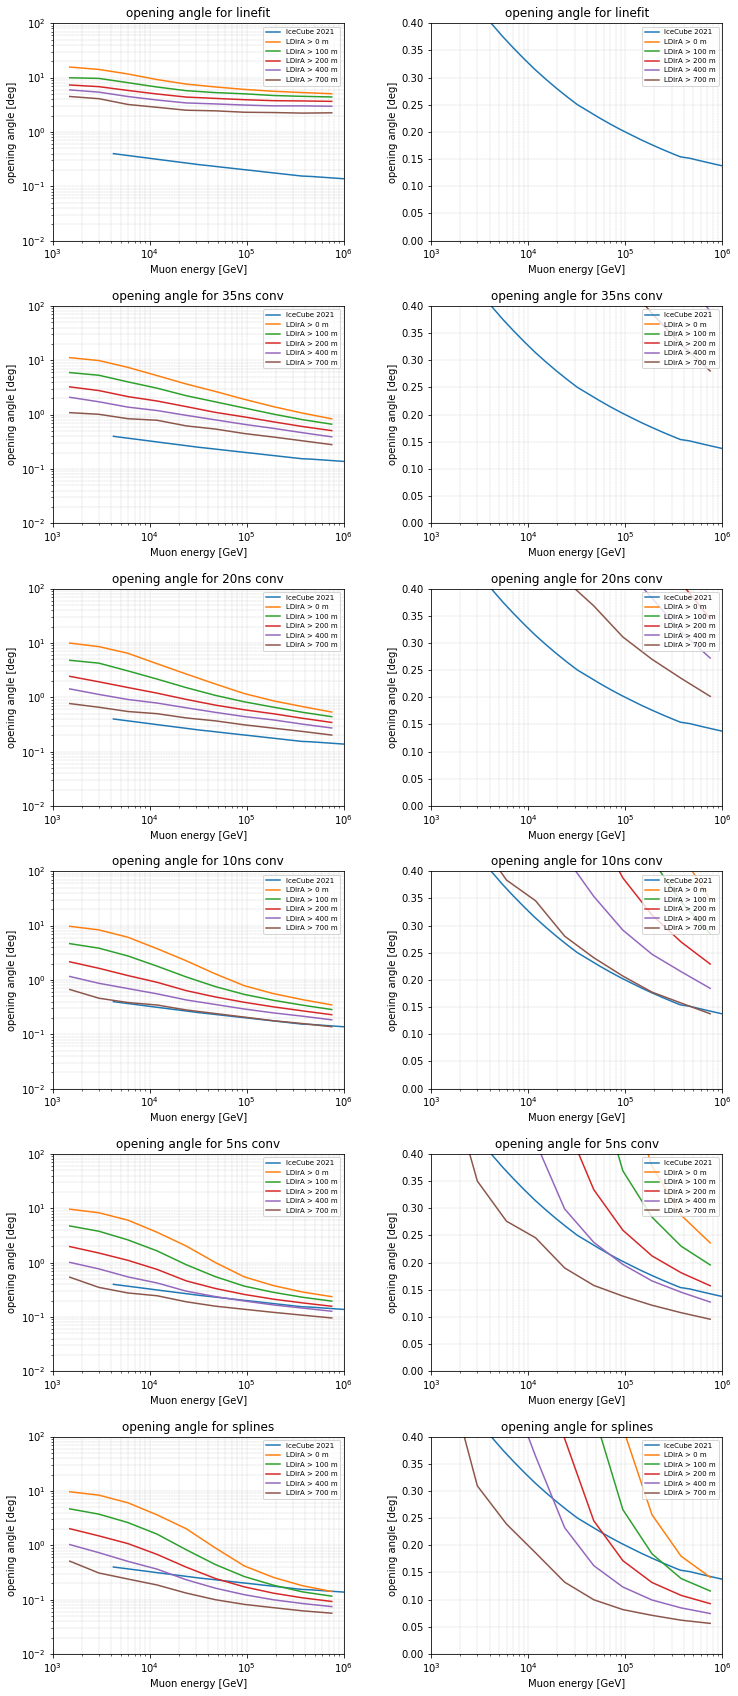

In [25]:
fig, axs = plt.subplots(len(dict_reco), 2, figsize=(12, 5*len(dict_reco)))
for i, (key, value) in enumerate(dict_reco.items()):
    # Add IceCube through going events data (2021)
    icecube = pd.read_csv("data/pointing_accuracy_through_going_icecube_2021.csv.csv")
    axs[i,0].plot(icecube.iloc[:, 0], icecube.iloc[:, 1], label='IceCube 2021')
    axs[i,1].plot(icecube.iloc[:, 0], icecube.iloc[:, 1], label='IceCube 2021')
    # plot angular error (low+up)
    
    for LDir in [0, 100, 200, 400, 700]:
        data = df.loc[(df['dirTrackLengthA_reco'] > LDir)]
        muon_energy = data.muon_energy
        resolution_mmsreco = data[value[1]]
        
        log_bin, median_log, std_log, low_log, up_log, num_log = binned_histogram(
            muon_energy, resolution_mmsreco, logspace=True
        )
                
        axs[i, 0].plot(log_bin, median_log, "-", label=f'LDirA > {LDir} m')
        axs[i, 1].plot(log_bin, median_log, "-", label=f'LDirA > {LDir} m')
        
    axs[i,0].grid(b=None, which="both", axis="both", linestyle="--", linewidth=0.3)
    axs[i,1].grid(b=None, which="both", axis="both", linestyle="--", linewidth=0.3)
    axs[i,0].set_xlabel("Muon energy [GeV]")
    axs[i,1].set_xlabel("Muon energy [GeV]")
    axs[i,0].set_ylabel("opening angle [deg]")
    axs[i,1].set_ylabel("opening angle [deg]")
    axs[i,0].set_title(f"opening angle for {key}")
    axs[i,1].set_title(f"opening angle for {key}")
    axs[i,0].set_ylim(1e-2, 1e2)
    axs[i,1].set_ylim(0, 0.4)
    axs[i,0].set_xlim(energy_min, energy_max)
    axs[i,1].set_xlim(energy_min, energy_max)
    axs[i,0].set_xscale("log")
    axs[i,1].set_xscale('log')
    axs[i,0].set_yscale('log')
    axs[i,0].legend(loc=1, prop={'size': 7})
    axs[i,1].legend(loc=1, prop={'size': 7})

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

# <span style='color:Black'> Angular resolution vs Muon Energy </span>

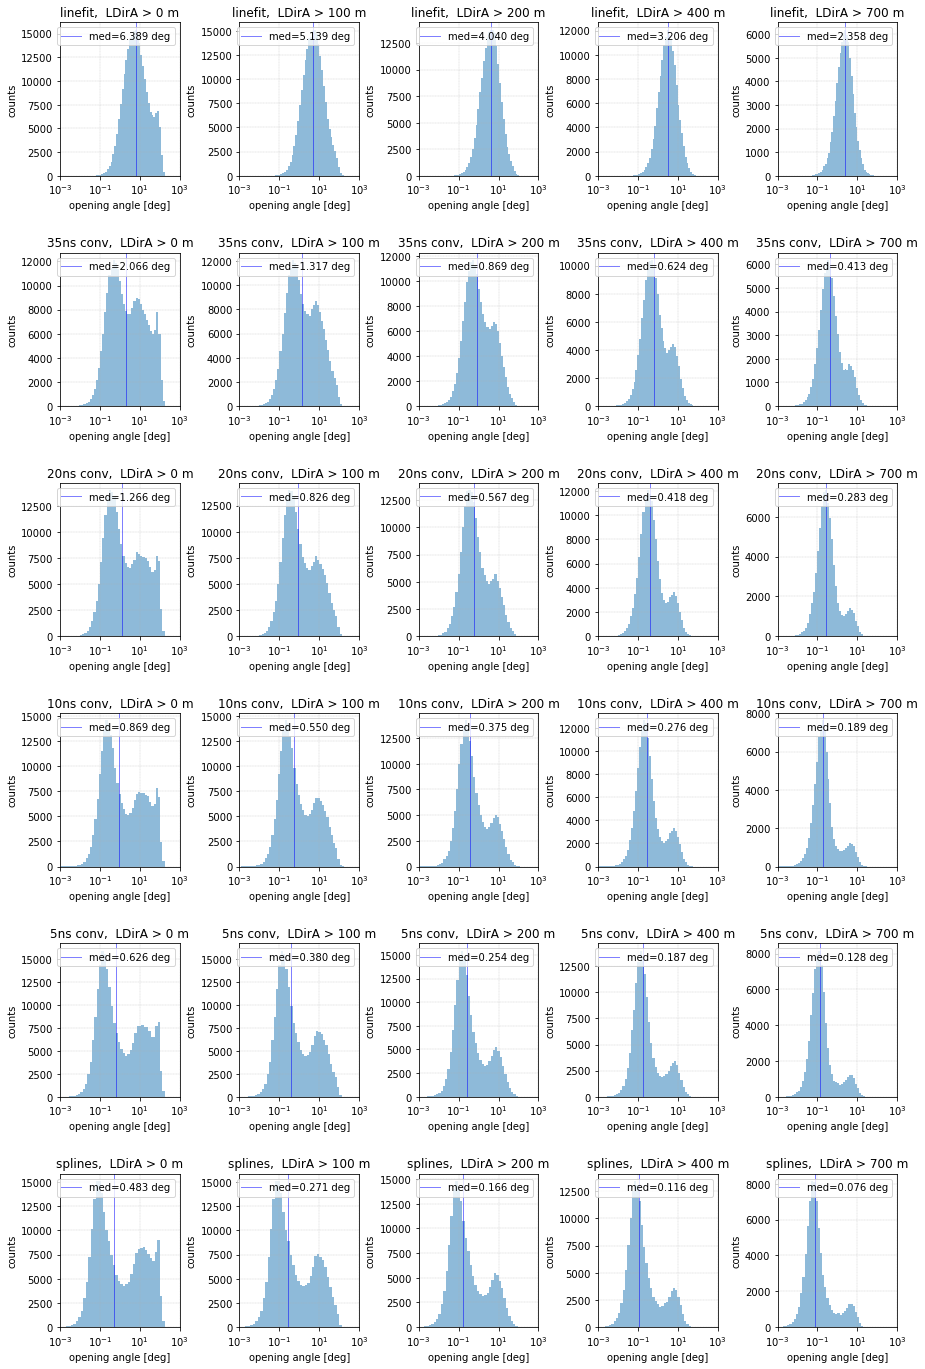

In [26]:
fig, axs = plt.subplots(len(dict_reco), 5, figsize=(15, 4*len(dict_reco)))
for i, (key, value) in enumerate(dict_reco.items()):
    # plot Histogram for each LDir log scale
    for j, LDir in enumerate([0, 100, 200, 400, 700]):
        data = df.loc[(df['dirTrackLengthA_reco'] > LDir)]
        muon_energy = data.muon_energy
        resolution_mmsreco = data[value[1]]
        
        binspec = np.logspace(np.min(np.log10(resolution_mmsreco)), 
                                  np.max(np.log10(resolution_mmsreco)), bins)
        x = np.median(resolution_mmsreco)
        
        axs[i,j].hist(resolution_mmsreco, bins=binspec, density=False, alpha=0.5)
        axs[i,j].axvline(x, color = 'b', label=f'med={x:.3f} deg', alpha=0.5, linewidth=1.0)
        axs[i,j].set_ylabel("counts")
        axs[i,j].set_title(f"{key},  LDirA > {LDir} m")
        axs[i,j].set_xlabel("opening angle [deg]")
        axs[i,j].set_xscale("log")
        axs[i,j].set_xlim(1e-3, 1e3)
        axs[i,j].grid(b=None, which="both", axis="both", linestyle="--", linewidth=0.3)
        axs[i,j].legend()
        
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

# <span style='color:Black'> Angular resolution vs Muon Energy </span>

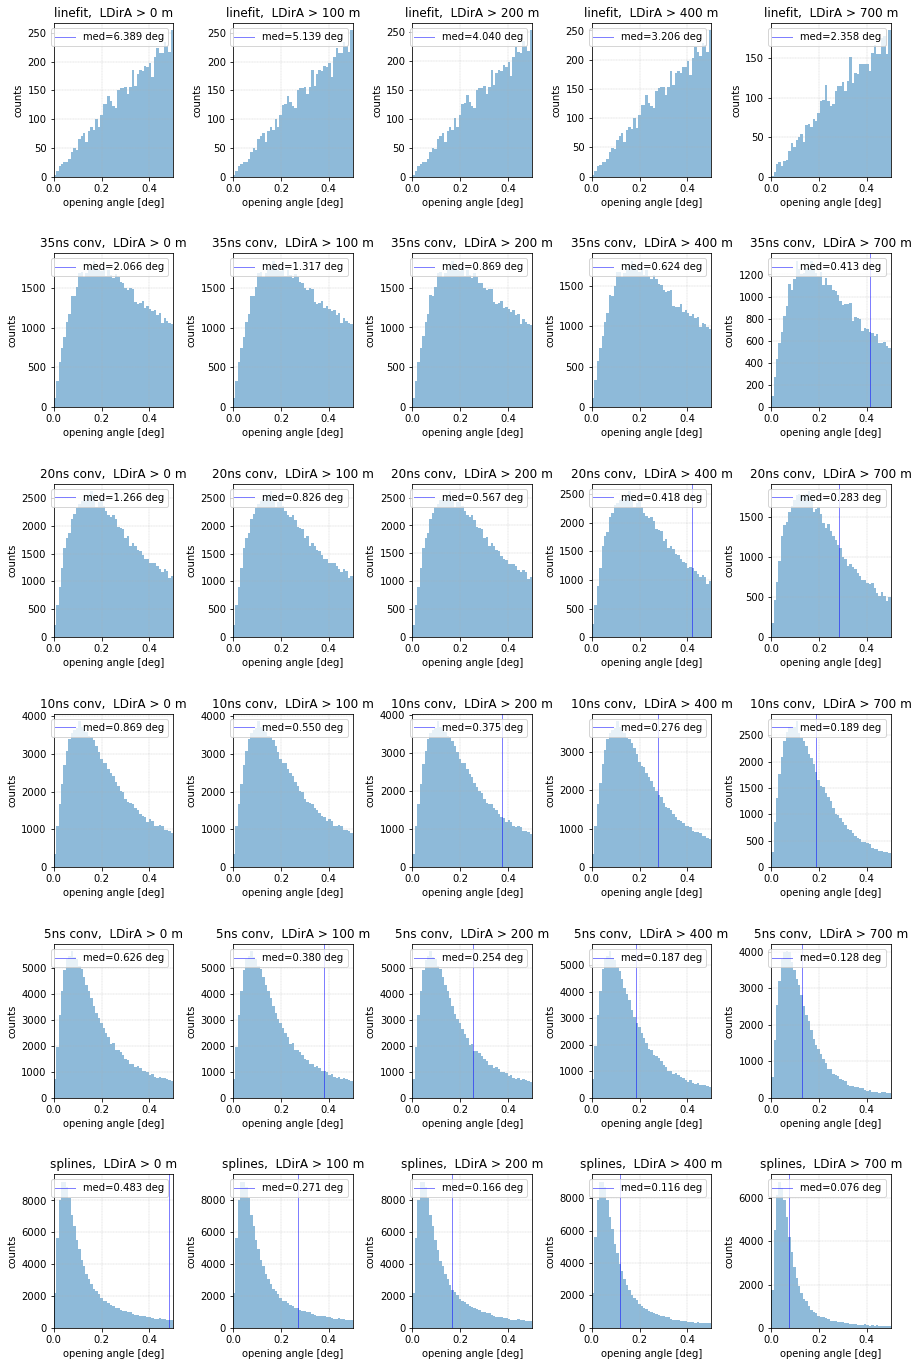

In [27]:
fig, axes = plt.subplots(len(dict_reco), 5, figsize=(15, 4*len(dict_reco)))
for i, (key, value) in enumerate(dict_reco.items()):
    # plot Histogram for each LDir log scale
    for j, LDir in enumerate([0, 100, 200, 400, 700]):
        data = df.loc[(df['dirTrackLengthA_reco'] > LDir)]
        muon_energy = data.muon_energy
        resolution_mmsreco = data[value[1]]
        xlower, xupper = 0, 0.5
        binspec = np.linspace(xlower, xupper, bins)
        
        x = np.median(resolution_mmsreco)
        axes[i,j].hist(resolution_mmsreco, bins=binspec, density=False, alpha=0.5)
        axes[i,j].axvline(x, color = 'b', label=f'med={x:.3f} deg', alpha=0.5, linewidth=1.0)
        axes[i,j].set_ylabel("counts")
        axes[i,j].set_title(f"{key},  LDirA > {LDir} m")
        axes[i,j].set_xlabel("opening angle [deg]")
        axes[i,j].set_xlim(0, xupper)
        axes[i,j].grid(b=None, which="both", axis="both", linestyle="--", linewidth=0.3)
        axes[i,j].legend()

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()